In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
B=pd.read_csv("C:/Users/TERIAK-JB/Desktop/GOMYCODE/titanic.csv",encoding ="iso-8859-1")

B.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [2]:
B.tail(13)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1297,3.0,0.0,"Wiseman, Mr. Phillippe",male,NaN,0.0,0.0,A/4. 34244,7.2500,NaN,S,NaN,NaN,NaN
1298,3.0,0.0,"Wittevrongel, Mr. Camille",male,36.0,0.0,0.0,345771,9.5000,NaN,S,NaN,NaN,NaN
1299,3.0,0.0,"Yasbeck, Mr. Antoni",male,27.0,1.0,0.0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3.0,1.0,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1.0,0.0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5,0.0,0.0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3.0,0.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN


In [3]:
B.dropna(axis=0,how='all',inplace=True)

In [4]:
B

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [5]:
B.isnull().sum()


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [6]:
B["age"].fillna(B["age"].mean(),inplace=True)
B["age"]=B["age"].apply(np.int)
B

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,29,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [7]:
B["survived"]=B["survived"].apply(np.int)
B

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0,"Zabour, Miss. Hileni",female,14,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0,"Zabour, Miss. Thamine",female,29,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0,"Zakarian, Mr. Mapriededer",male,26,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0,"Zakarian, Mr. Ortin",male,27,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [8]:
B["pclass"]=B["pclass"].apply(np.int)
B

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [9]:
B["sibsp"]=B["sibsp"].apply(np.int)
B

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29,1,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [10]:
B["parch"]=B["parch"].apply(np.int)
B


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [11]:
B

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [12]:
B.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [13]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   int64  
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 153.4+ KB


In [14]:
B["fare"].fillna(B["fare"].mode(),inplace=True)
B

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [15]:
B.isnull().sum()


pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [16]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   int64  
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 153.4+ KB


In [17]:
B

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [18]:
B['embarked'].value_counts()


S    914
C    270
Q    123
Name: embarked, dtype: int64

In [19]:
B["embarked"].fillna('S',inplace=True)
B

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [20]:
B["fare"].fillna(B["fare"].median(),inplace=True)
B

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [21]:
B.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [22]:
B['home.dest'].value_counts()

New York, NY            64
London                  14
Montreal, PQ            10
Paris, France            9
Cornwall / Akron, OH     9
                        ..
London / Middlesex       1
Southsea, Hants          1
Belfast, NI              1
London Brooklyn, NY      1
Greensburg, PA           1
Name: home.dest, Length: 369, dtype: int64

In [23]:
B["home.dest"].fillna("New York NK",inplace=True)
B

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,NaN,C,NaN,328.0,New York NK
1305,3,0,"Zabour, Miss. Thamine",female,29,1,0,2665,14.4542,NaN,C,NaN,NaN,New York NK
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,NaN,C,NaN,304.0,New York NK
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,NaN,C,NaN,NaN,New York NK


In [24]:
B.drop("cabin",1,inplace=True)

In [25]:
B.drop("boat",1,inplace=True)

In [26]:
B.drop("body",1,inplace=True)

In [27]:
B.drop("ticket",1,inplace=True)

In [123]:
B

,pclass,survived,name,sex,age,sibsp,parch,embarked,home.dest,Title,Family
0,1,1,21,1,29,0,0,2,"St Louis, MO",Miss,0
1,1,1,23,0,0,1,2,2,"Montreal, PQ / Chesterville, ON",Master,3
2,1,0,24,1,2,1,2,2,"Montreal, PQ / Chesterville, ON",Miss,3
3,1,0,25,0,30,1,2,2,"Montreal, PQ / Chesterville, ON",Mr,3
4,1,0,26,1,25,1,2,2,"Montreal, PQ / Chesterville, ON",Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1291,1,14,1,0,0,New York NK,Miss,1
1305,3,0,1292,1,29,1,0,0,New York NK,Miss,1
1306,3,0,1293,0,26,0,0,0,New York NK,Mr,0
1307,3,0,1294,0,27,0,0,0,New York NK,Mr,0


### relation entre age et sex

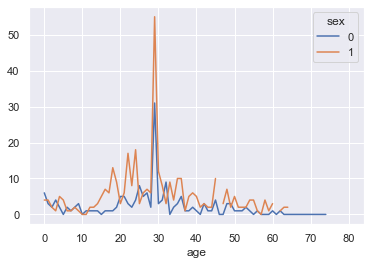

In [88]:
B.pivot_table('survived', index='age',columns='sex',aggfunc="sum").plot()

In [89]:
B.corr()['survived'].sort_values()


pclass     -0.312469
embarked   -0.175313
age        -0.047021
name       -0.032298
sibsp      -0.027825
Family      0.026876
parch       0.082660
sex         0.528693
survived    1.000000
Name: survived, dtype: float64

In [90]:
B

,pclass,survived,name,sex,age,sibsp,parch,embarked,home.dest,Title,Family
0,1,1,21,1,29,0,0,2,"St Louis, MO",Miss,0
1,1,1,23,0,0,1,2,2,"Montreal, PQ / Chesterville, ON",Master,3
2,1,0,24,1,2,1,2,2,"Montreal, PQ / Chesterville, ON",Miss,3
3,1,0,25,0,30,1,2,2,"Montreal, PQ / Chesterville, ON",Mr,3
4,1,0,26,1,25,1,2,2,"Montreal, PQ / Chesterville, ON",Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1291,1,14,1,0,0,New York NK,Miss,1
1305,3,0,1292,1,29,1,0,0,New York NK,Miss,1
1306,3,0,1293,0,26,0,0,0,New York NK,Mr,0
1307,3,0,1294,0,27,0,0,0,New York NK,Mr,0


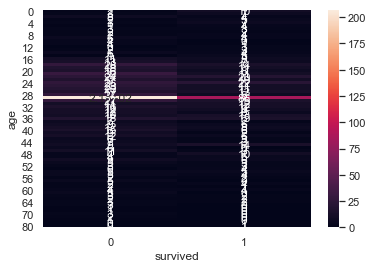

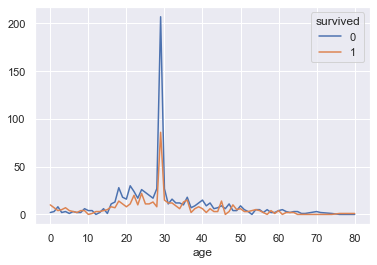

In [91]:
import seaborn as sns 
import pandas as pd
age_survived=pd.crosstab(B['age'],B['survived'])
sns.heatmap (age_survived, annot = True)
age_survived.plot()

In [92]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   int32 
 3   sex        1309 non-null   int64 
 4   age        1309 non-null   int64 
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   embarked   1309 non-null   int32 
 8   home.dest  1309 non-null   object
 9   Title      1309 non-null   object
 10  Family     1309 non-null   int64 
dtypes: int32(2), int64(7), object(2)
memory usage: 152.5+ KB


In [93]:
B.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
embarked     0
home.dest    0
Title        0
Family       0
dtype: int64

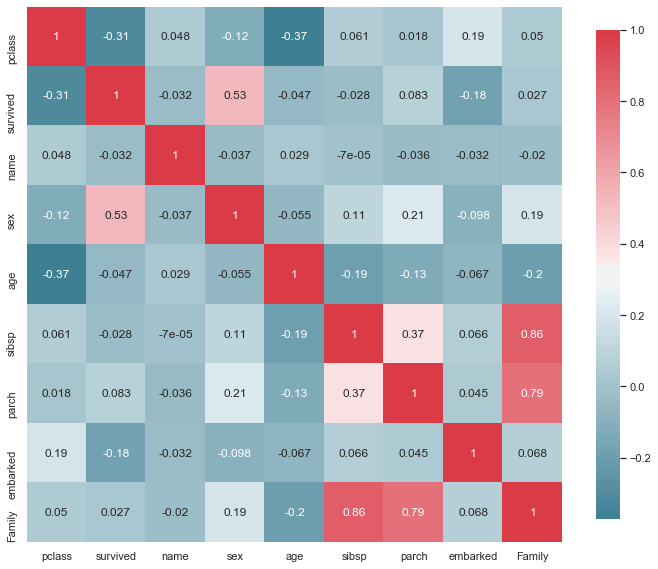

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

plot_correlation_map( B )


In [95]:
B[['survived','pclass']].groupby(['pclass'],as_index=True).mean().plot

In [96]:
# création de colonne TITRE

In [97]:
C=[]
df=" "
for x in B["name"]:
    df=x.split(",")
    df=df[1].split(".")
    df1=df[0].strip()
    C.append(df1)
    
B["Title"]=C
B

AttributeError: 'int' object has no attribute 'split'

In [98]:
B.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
embarked     0
home.dest    0
Title        0
Family       0
dtype: int64

In [99]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":       "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir":        "Royalty",

                   "Lady":        "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss":       "Miss",

                    "Ms":         "Mrs",

                    "Mr":         "Mr",

                    "Mrs":        "Mrs",

                    "Master":     "Master"

                    }

In [100]:
B["Title"].replace(Title_Dictionary,inplace=True)
B

,pclass,survived,name,sex,age,sibsp,parch,embarked,home.dest,Title,Family
0,1,1,21,1,29,0,0,2,"St Louis, MO",Miss,0
1,1,1,23,0,0,1,2,2,"Montreal, PQ / Chesterville, ON",Master,3
2,1,0,24,1,2,1,2,2,"Montreal, PQ / Chesterville, ON",Miss,3
3,1,0,25,0,30,1,2,2,"Montreal, PQ / Chesterville, ON",Mr,3
4,1,0,26,1,25,1,2,2,"Montreal, PQ / Chesterville, ON",Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1291,1,14,1,0,0,New York NK,Miss,1
1305,3,0,1292,1,29,1,0,0,New York NK,Miss,1
1306,3,0,1293,0,26,0,0,0,New York NK,Mr,0
1307,3,0,1294,0,27,0,0,0,New York NK,Mr,0


In [101]:
B["Title"].value_counts()

Mr         757
Miss       263
Mrs        199
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

C:\Users\TERIAK-JB\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


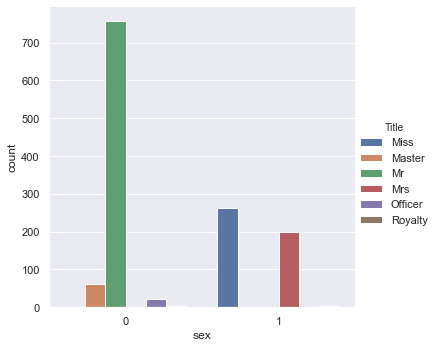

In [102]:
import seaborn as sns
sns.factorplot('sex',data=B,kind="count", hue="Title")

In [103]:
B.head(10)

,pclass,survived,name,sex,age,sibsp,parch,embarked,home.dest,Title,Family
0,1,1,21,1,29,0,0,2,"St Louis, MO",Miss,0
1,1,1,23,0,0,1,2,2,"Montreal, PQ / Chesterville, ON",Master,3
2,1,0,24,1,2,1,2,2,"Montreal, PQ / Chesterville, ON",Miss,3
3,1,0,25,0,30,1,2,2,"Montreal, PQ / Chesterville, ON",Mr,3
4,1,0,26,1,25,1,2,2,"Montreal, PQ / Chesterville, ON",Mrs,3
5,1,1,30,0,48,0,0,2,"New York, NY",Mr,0
6,1,1,45,1,63,1,0,2,"Hudson, NY",Miss,1
7,1,0,46,0,39,0,0,2,"Belfast, NI",Mr,0
8,1,1,50,1,53,2,0,2,"Bayside, Queens, NY",Mrs,2
9,1,0,54,0,71,0,0,0,"Montevideo, Uruguay",Mr,0


In [104]:
Family=pd.DataFrame()
Family=B["Family"]=B["parch"]+B["sibsp"]
Family

0       0
1       3
2       3
3       3
4       3
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Length: 1309, dtype: int64

In [105]:
Family_Title=pd.DataFrame()
Family_Title=B[['Family','Title']].groupby(['Family'],as_index=True)
Family_Title

In [126]:
B.name.unique()

array([  21,   23,   24, ..., 1293, 1294, 1295], dtype=int64)

In [127]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
B['name']=encoder.fit_transform(B['name'])
B


,pclass,survived,name,sex,age,sibsp,parch,embarked,home.dest,Title,Family
0,1,1,21,1,29,0,0,2,"St Louis, MO",Miss,0
1,1,1,23,0,0,1,2,2,"Montreal, PQ / Chesterville, ON",Master,3
2,1,0,24,1,2,1,2,2,"Montreal, PQ / Chesterville, ON",Miss,3
3,1,0,25,0,30,1,2,2,"Montreal, PQ / Chesterville, ON",Mr,3
4,1,0,26,1,25,1,2,2,"Montreal, PQ / Chesterville, ON",Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1291,1,14,1,0,0,New York NK,Miss,1
1305,3,0,1292,1,29,1,0,0,New York NK,Miss,1
1306,3,0,1293,0,26,0,0,0,New York NK,Mr,0
1307,3,0,1294,0,27,0,0,0,New York NK,Mr,0


In [128]:
encoder=LabelEncoder()
B['embarked']=encoder.fit_transform(B['embarked'])

In [129]:
Cleanup_nums={"female":1,"male":0
}
B.replace(Cleanup_nums,inplace=True)
B

,pclass,survived,name,sex,age,sibsp,parch,embarked,home.dest,Title,Family
0,1,1,21,1,29,0,0,2,"St Louis, MO",Miss,0
1,1,1,23,0,0,1,2,2,"Montreal, PQ / Chesterville, ON",Master,3
2,1,0,24,1,2,1,2,2,"Montreal, PQ / Chesterville, ON",Miss,3
3,1,0,25,0,30,1,2,2,"Montreal, PQ / Chesterville, ON",Mr,3
4,1,0,26,1,25,1,2,2,"Montreal, PQ / Chesterville, ON",Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1291,1,14,1,0,0,New York NK,Miss,1
1305,3,0,1292,1,29,1,0,0,New York NK,Miss,1
1306,3,0,1293,0,26,0,0,0,New York NK,Mr,0
1307,3,0,1294,0,27,0,0,0,New York NK,Mr,0


In [130]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x=B[["age",'sex',"Family"]]
y=B["survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.77


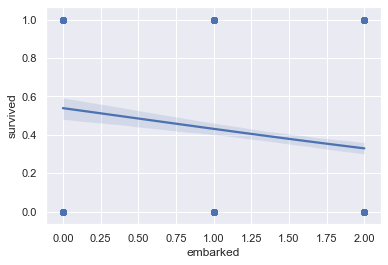

In [131]:
sns.regplot(x='embarked',y='survived',data=B,logistic=True)

In [132]:
confusion_matrix = pd.crosstab(y_test,y_pred,rownames=['actual'],colnames=['predicted'])
print (confusion_matrix)   

predicted    0    1
actual             
0          244   42
1           64  109


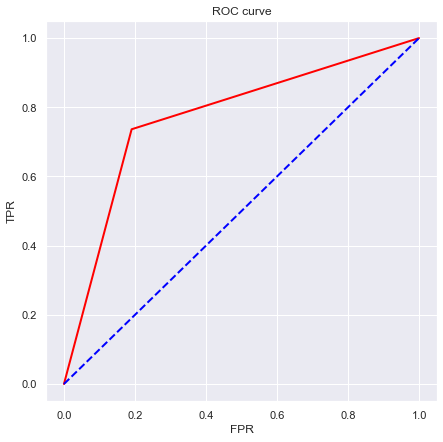

In [133]:
fpr, tpr,_=roc_curve(logreg.predict(x),y,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

l'allure de la courbe se repproche de l'axe des ordonnées.les données sont correctes

In [134]:
logreg.predict([[20 ,0,3]])

array([0], dtype=int64)

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [143]:
#features extraction
x=B[["age","sex","Family"]]
y=B["survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree = DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
tree.score(x_test,y_test)

0.7480916030534351

In [144]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
random_grid = {'n_estimators': n_estimators,}

param_grid = {
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.8s finished


{'n_estimators': 100}

In [146]:
#features extraction
x=B[["age","sex","Family"]]
y=B["survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree =RandomForestClassifier(n_estimators=100)  #Creating a random forest with 100 decision trees

tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
tree.score(x_test,y_test)


0.7595419847328244